## 머신러닝 실습

### 와인품질 등급 회귀분석

#### 데이터 수집

##### UC 어바인 머신러닝 연구소 모듈 사용

In [1]:
## 필수 라이브러리 등록
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from ucimlrepo import fetch_ucirepo

In [3]:
## 와인 데이터 가져오기
wineQuality = fetch_ucirepo(id= 186)

In [5]:
dfwineQuality = wineQuality.data.original

In [6]:
dfwineQuality.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6497 entries, 0 to 6496
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed_acidity         6497 non-null   float64
 1   volatile_acidity      6497 non-null   float64
 2   citric_acid           6497 non-null   float64
 3   residual_sugar        6497 non-null   float64
 4   chlorides             6497 non-null   float64
 5   free_sulfur_dioxide   6497 non-null   float64
 6   total_sulfur_dioxide  6497 non-null   float64
 7   density               6497 non-null   float64
 8   pH                    6497 non-null   float64
 9   sulphates             6497 non-null   float64
 10  alcohol               6497 non-null   float64
 11  quality               6497 non-null   int64  
 12  color                 6497 non-null   object 
dtypes: float64(11), int64(1), object(1)
memory usage: 660.0+ KB


In [7]:
dfwineQuality.tail()

,fixed_acidity,volatile_acidity,citric_acid,residual_sugar,chlorides,free_sulfur_dioxide,total_sulfur_dioxide,density,pH,sulphates,alcohol,quality,color
6492,6.2,0.21,0.29,1.6,0.039,24.0,92.0,0.99114,3.27,0.50,11.2,6,white
6493,6.6,0.32,0.36,8.0,0.047,57.0,168.0,0.99490,3.15,0.46,9.6,5,white
6494,6.5,0.24,0.19,1.2,0.041,30.0,111.0,0.99254,2.99,0.46,9.4,6,white
6495,5.5,0.29,0.30,1.1,0.022,20.0,110.0,0.98869,3.34,0.38,12.8,7,white
6496,6.0,0.21,0.38,0.8,0.020,22.0,98.0,0.98941,3.26,0.32,11.8,6,white


##### 머신러닝 준비
- x, y 값 생성

In [11]:
x = dfwineQuality.drop(['quality', 'color'], axis=1)

In [ ]:
y= dfwineQuality['quality']

#### 분석 모델 구축, 결과 분석

In [19]:
## 회귀분석용 모델, 함수 사용등록
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
import sklearn

In [79]:
# 훈련용 데이터와 검증(평가용) 데이터 분리
# random_state= 0 ~ 40
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size= 0.2, random_state= 20)

In [69]:
x_train

,fixed_acidity,volatile_acidity,citric_acid,residual_sugar,chlorides,free_sulfur_dioxide,total_sulfur_dioxide,density,pH,sulphates,alcohol
5879,5.7,0.22,0.20,16.0,0.044,41.0,113.0,0.99862,3.22,0.46,8.9
1057,7.6,0.42,0.25,3.9,0.104,28.0,90.0,0.99784,3.15,0.57,9.1
5669,6.1,0.28,0.27,8.0,0.048,41.0,162.0,0.99498,3.21,0.51,9.9
6176,6.3,0.15,0.34,11.4,0.050,25.0,96.0,0.99754,3.21,0.49,10.0
5002,8.8,0.27,0.25,5.0,0.024,52.0,99.0,0.99250,2.87,0.49,11.4
...,...,...,...,...,...,...,...,...,...,...,...
3842,6.7,0.23,0.42,11.2,0.047,52.0,171.0,0.99758,3.54,0.74,10.4
1892,6.2,0.28,0.22,7.3,0.041,26.0,157.0,0.99570,3.44,0.64,9.8
3082,6.9,0.25,0.24,3.6,0.057,13.0,85.0,0.99420,2.99,0.48,9.5
5695,8.0,0.25,0.35,1.1,0.054,13.0,136.0,0.99366,3.08,0.55,9.5


In [70]:
x_test

,fixed_acidity,volatile_acidity,citric_acid,residual_sugar,chlorides,free_sulfur_dioxide,total_sulfur_dioxide,density,pH,sulphates,alcohol
5001,7.7,0.46,0.18,3.30,0.054,18.0,143.0,0.99392,3.12,0.51,10.8
2943,7.3,0.23,0.37,1.90,0.041,51.0,165.0,0.99080,3.26,0.40,12.2
6341,6.0,0.27,0.32,3.60,0.035,36.0,133.0,0.99215,3.23,0.46,10.8
4385,8.0,0.30,0.36,11.00,0.034,8.0,70.0,0.99354,3.05,0.41,12.2
2519,7.0,0.11,0.32,4.60,0.057,59.0,144.0,0.99560,3.55,0.44,9.4
...,...,...,...,...,...,...,...,...,...,...,...
5756,7.4,0.16,0.30,13.70,0.056,33.0,168.0,0.99825,2.90,0.44,8.7
4107,6.6,0.26,0.25,11.60,0.045,45.0,178.0,0.99691,3.33,0.43,9.8
4824,6.6,0.33,0.40,2.65,0.041,35.0,86.0,0.98916,3.11,0.39,13.3
1209,6.2,0.39,0.43,2.00,0.071,14.0,24.0,0.99428,3.45,0.87,11.2


In [71]:
y_train

5879    6
1057    5
5669    5
6176    6
5002    5
       ..
3842    5
1892    7
3082    4
5695    5
1442    5
Name: quality, Length: 5197, dtype: int64

In [72]:
y_test

5001    6
2943    8
6341    6
4385    6
2519    7
       ..
5756    7
4107    6
4824    7
1209    7
4145    5
Name: quality, Length: 1300, dtype: int64

In [28]:
## 선형회귀 모델 생성
model = LinearRegression()

In [80]:
# 선형회귀 모델 훈련
model.fit(x_train, y_train) # x는 독립변수, y는 종속변수(quality)

LinearRegression()

In [81]:
# 선형회귀 분석, 예측
# x_test를 매개변수로 실행했을 때 문제가 생기면 np.array(x_test)를 사용
y_predict = model.predict(x_test)

In [34]:
y_test

6065    5
6417    6
281     7
2400    5
256     5
       ..
6443    6
382     6
4185    7
4944    6
1144    5
Name: quality, Length: 1950, dtype: int64

In [35]:
y_predict

array([5.94751835, 7.00710726, 5.82828291, ..., 5.39394524, 6.22637817,
       5.85967006])

In [82]:
## 분석 평가지표별 수치]
## MSE, RMSE가 0에 가까우면 예측값과 실제값간의 차이가 거의 없음
mse = mean_squared_error(y_test, y_predict)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_predict)

print(f'MSE = {mse:.4f}')
print(f'RMSE = {rmse:.4f}')
print(f'R^2(VS) = {r2:.4f}')

MSE = 0.5718
RMSE = 0.7561
R^2(VS) = 0.2809


In [83]:
## Y 절편값, 회귀계수 값
print(f'Y절편값 = {model.intercept_:.4f}')
print(f'독립변수별 회귀계수값 = {np.round(model.coef_, 1)}')

Y절편값 = 58.1703
독립변수별 회귀계수값 = [  0.1  -1.3  -0.1   0.   -0.4   0.   -0.  -57.3   0.4   0.7   0.3]


In [84]:
pd.Series(data= np.round(model.coef_, 2), index= x.columns)

fixed_acidity            0.07
volatile_acidity        -1.32
citric_acid             -0.13
residual_sugar           0.04
chlorides               -0.43
free_sulfur_dioxide      0.01
total_sulfur_dioxide    -0.00
density                -57.34
pH                       0.44
sulphates                0.74
alcohol                  0.26
dtype: float64

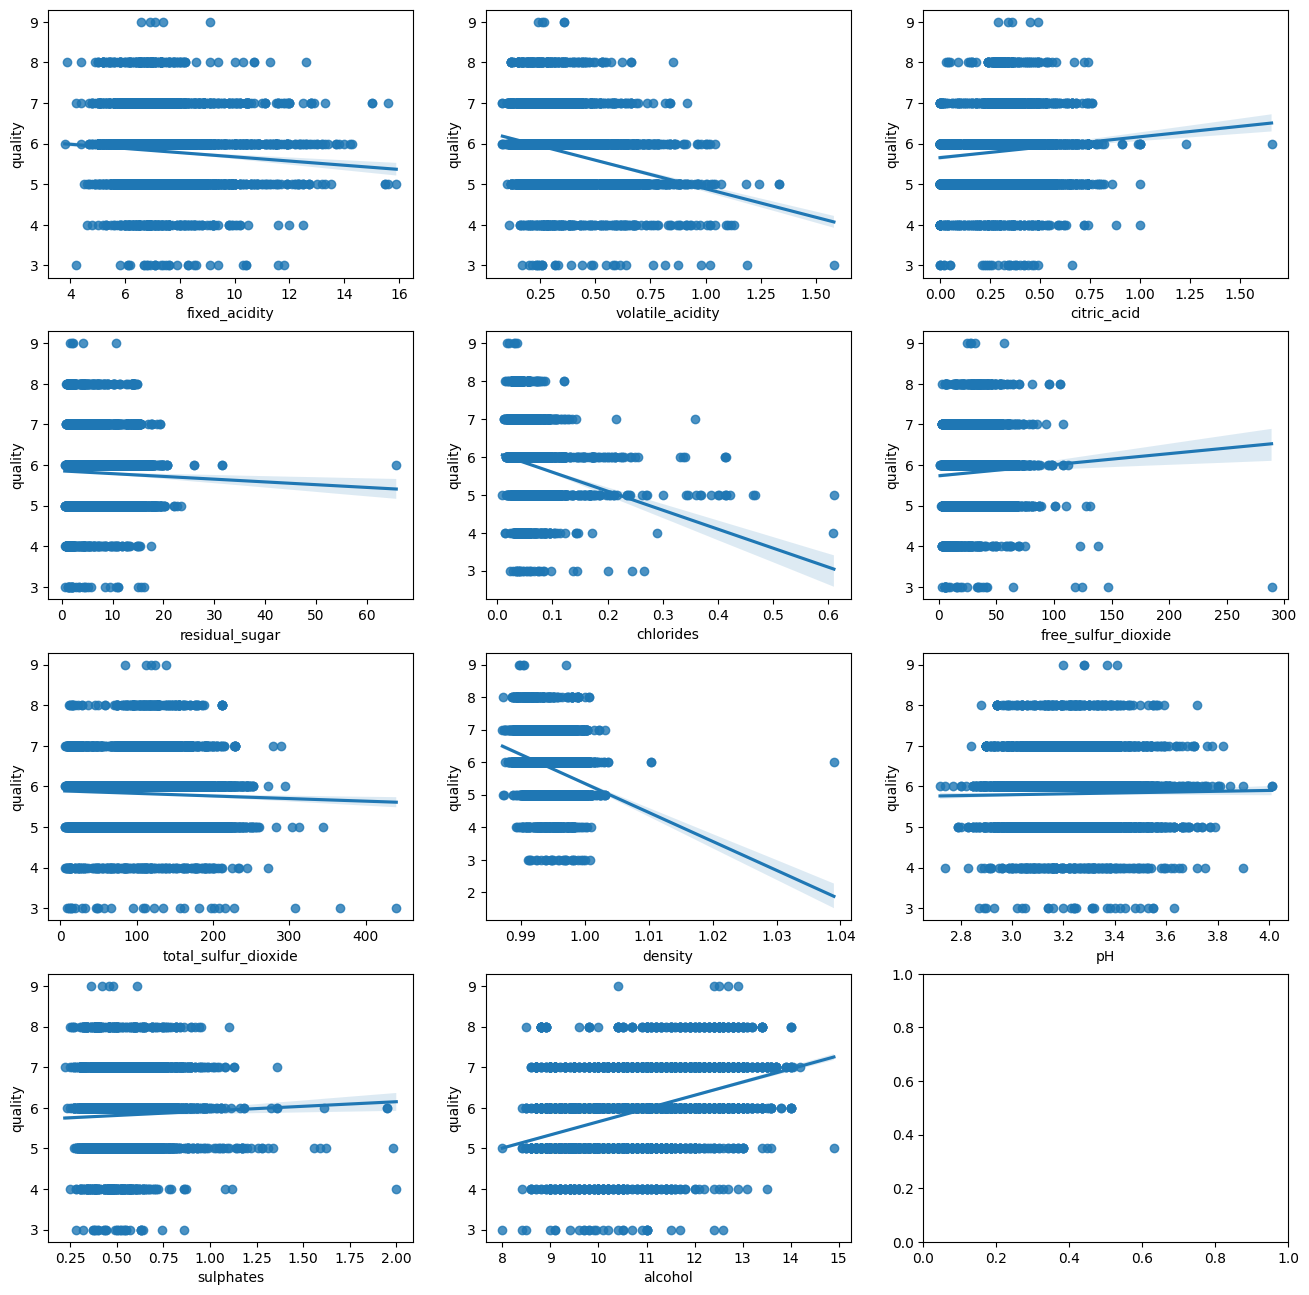

In [85]:
## 산점도
fig, axs = plt.subplots(figsize=(16,16), ncols=3, nrows= 4)

x_features = list(x.columns)

for i, feat in enumerate(x_features):
    row = i //3
    col = i % 3
    sns.regplot(data= dfwineQuality, x= feat, y='quality', ax=axs[row][col])

plt.show()

In [52]:
## 9등급 와인 추출
dfTemp = dfwineQuality[dfwineQuality['quality'] == 9]

In [56]:
## 9등급 와인 최종 테스트 값
dfWineTop = dfTemp.drop(['quality', 'color'], axis=1)

In [57]:
predicts = model.predict(dfWineTop)

In [58]:
predicts

array([6.01846969, 6.55978578, 6.49665658, 6.69183305, 6.64952633])

##### 결론
- 머신러닝으로 학습을 해도 9등급 와인에 대해서 제대로 예측을 못함